### Proceso de exploración y análisis

#### Objetivo
Entender la información que se nos es dada con el fin de proveer coclusiones dirigidas a la parte interesada, también se realizará con el fin de generar proyecciones y análisis a cerca de las tendencias de los desarrolladores, y cómo se ha comportado la rúbrica del talento tecnológico.

In [106]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import HuberRegressor
import seaborn as sns
import numpy as np

In [107]:
captone_data = pd.read_csv('data_cleaned.csv', index_col=0)

En el mapa de correlación (mapa de calor), no se observan correlaciones que sea relevante o importante, al menos respecto a datos numéricos. 

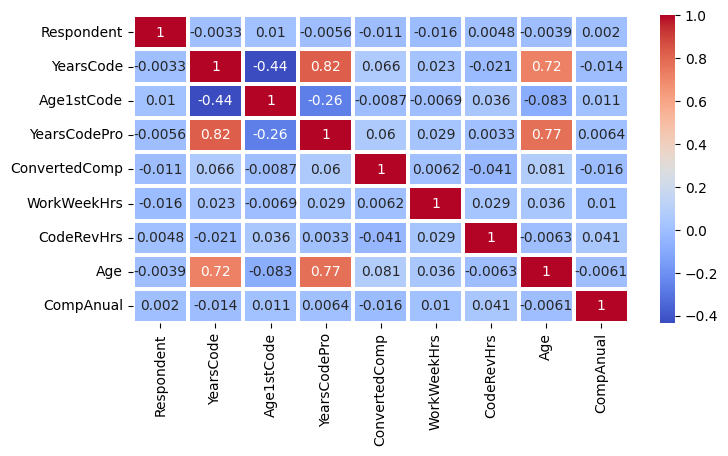

In [108]:
heat_corr = captone_data.select_dtypes('number').corr()

plt.figure(figsize=(8, 4))

sns.heatmap(heat_corr, annot=True, cmap='coolwarm', linewidths=1.5)
plt.show()

El histograma refleja una cola relativamente larga a la derecha, tiene un sesgo el cual se podría explicar a que con el paso del tiempo los programadores pasan a otros cargos (es posible que sea a directivos o dirección), o también es debido a que por la experiencia adquirida requieren de mucha menos ayuda de StackOverflow.

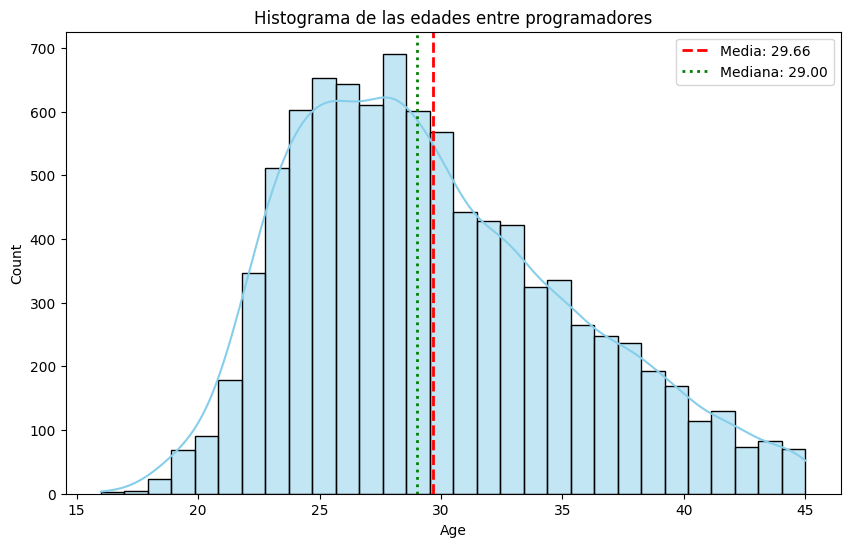

In [109]:
media = captone_data['Age'].mean()
mediana = captone_data['Age'].median()

# Crear el histograma
plt.figure(figsize=(10, 6))
sns.histplot(captone_data['Age'], kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de las edades entre programadores')

# Añadir líneas para la media y la mediana
plt.axvline(media, color='r', linestyle='dashed', linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(mediana, color='g', linestyle='dotted', linewidth=2, label=f'Mediana: {mediana:.2f}')

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [110]:
sesgo = captone_data['Age'].skew()
curtosis = captone_data['Age'].kurtosis()

print(f"Sesgo: {sesgo}")
print(f"Curtosis: {curtosis}")

Sesgo: 0.5480613003532098
Curtosis: -0.32486332153032293


En el siguiente gráfico circular nos señala que aproximadamente el 81% de los programadores a pesar de ver la programación como un hobby, los que reciben los salarios más altos son quienes no lo toman como hobby.

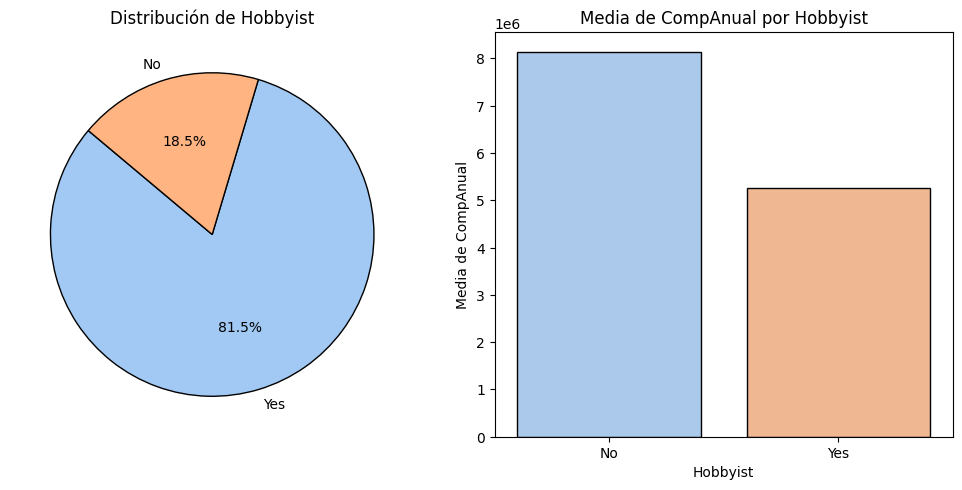

In [111]:
# Calcular la media de CompAnual agrupada por Hobbyist
mean_companual_by_hobbyist = captone_data[['Hobbyist', 'CompAnual']].groupby('Hobbyist').mean().reset_index()

# Configurar el estilo de los gráfico
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico circular para Hobbyist
hobbyist_counts = captone_data['Hobbyist'].value_counts()
colors_hobbyist = sns.color_palette("pastel")[0:len(hobbyist_counts)]
axes[0].pie(hobbyist_counts, labels=hobbyist_counts.index, autopct='%1.1f%%', startangle=140, colors=colors_hobbyist, wedgeprops=dict(edgecolor='k'))
axes[0].set_title('Distribución de Hobbyist')

# Gráfico de barras para la media de CompAnual por Hobbyist
sns.barplot(x='Hobbyist', y='CompAnual', hue='Hobbyist', data=mean_companual_by_hobbyist, ax=axes[1], palette="pastel", edgecolor='k', dodge=False)
axes[1].set_title('Media de CompAnual por Hobbyist')
axes[1].set_ylabel('Media de CompAnual')
axes[1].set_xlabel('Hobbyist')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

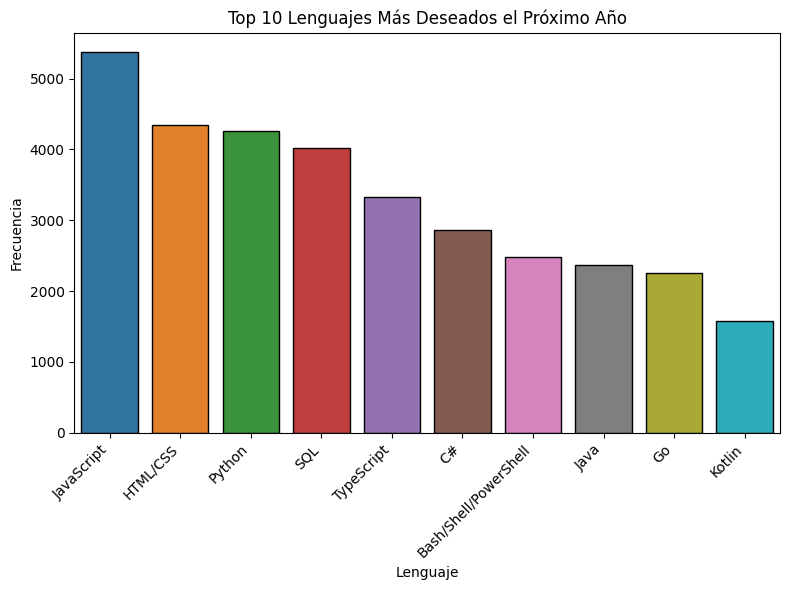

In [112]:

# Obtener los 10 lenguajes más deseados
top_language_next = captone_data['LanguageDesireNextYear'].str.split(';').explode().value_counts().head(10).reset_index()
top_language_next.columns = ['Language', 'Count']

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
colors = sns.color_palette("viridis", len(top_language_next))
bar_plot = sns.barplot(x='Language', y='Count', data=top_language_next, hue=colors, edgecolor='black')

# Rotar las etiquetas del eje X
plt.xticks(rotation=45, ha='right')

# Añadir título y etiquetas
plt.title('Top 10 Lenguajes Más Deseados el Próximo Año')
plt.xlabel('Lenguaje')
plt.ylabel('Frecuencia')
bar_plot.legend_.remove()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

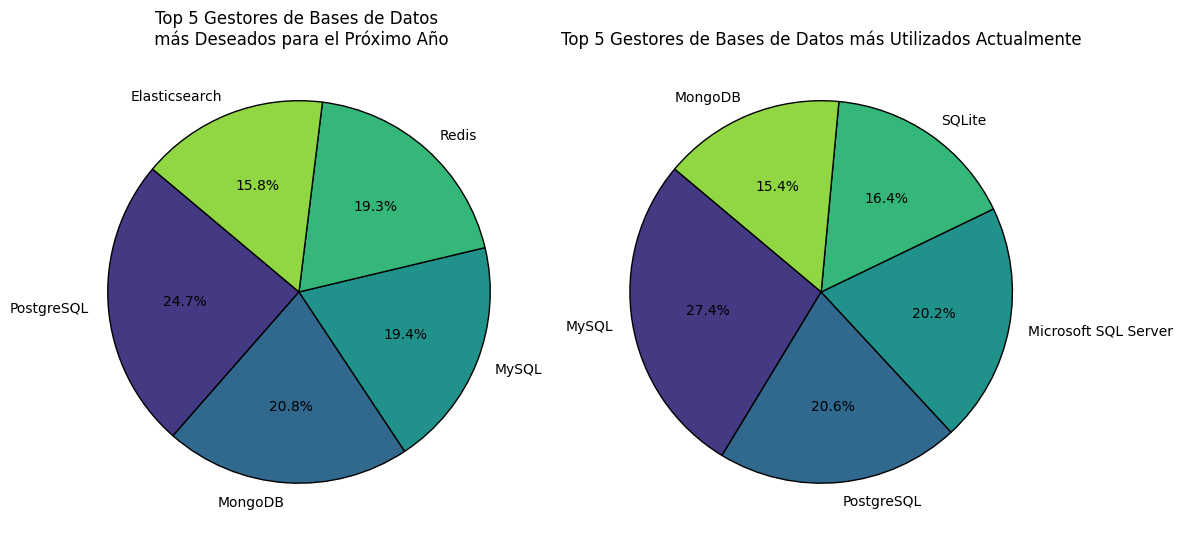

In [113]:
top_ddbb_next = captone_data['DatabaseDesireNextYear'].str.split(';').explode().value_counts().reset_index().head(5)
top_ddbb_next.columns = ['Database', 'Count']

# Obtener los gestores de bases de datos más utilizados actualmente
top_ddbb_currently = captone_data['DatabaseWorkedWith'].str.split(';').explode().value_counts().reset_index().head(5)
top_ddbb_currently.columns = ['Database', 'Count']

# Crear dos gráficos circulares en el mismo lienzo
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico circular de los gestores de bases de datos más deseados
colors_next = sns.color_palette("viridis", len(top_ddbb_next))
axes[0].pie(top_ddbb_next['Count'], labels=top_ddbb_next['Database'], colors=colors_next, autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='black'))
axes[0].set_title('Top 5 Gestores de Bases de Datos \n más Deseados para el Próximo Año')

# Gráfico circular de los gestores de bases de datos más utilizados actualmente
colors_currently = sns.color_palette("plasma", len(top_ddbb_currently))
axes[1].pie(top_ddbb_currently['Count'], labels=top_ddbb_currently['Database'], colors=colors_next, autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='black'))
axes[1].set_title('Top 5 Gestores de Bases de Datos más Utilizados Actualmente')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

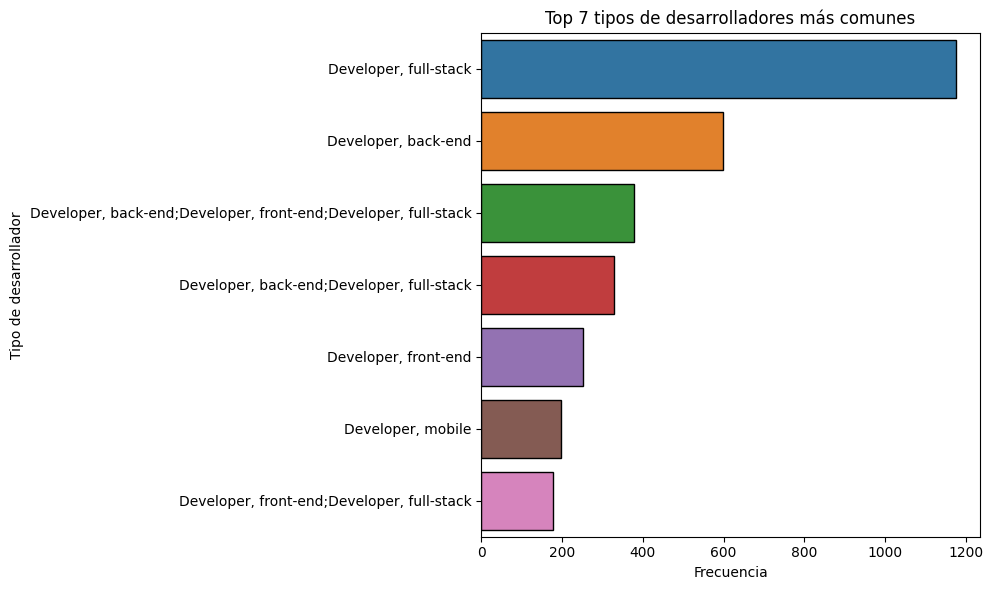

In [114]:
top_dev_types = captone_data['DevType'].value_counts().head(7).reset_index()
top_dev_types.columns = ['DevType', 'Count']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
colors = sns.color_palette("viridis", len(top_dev_types))
bar_plot = sns.barplot(x='Count', y='DevType', data=top_dev_types, hue=colors, edgecolor='black')

# Añadir título y etiquetas
plt.title('Top 7 tipos de desarrolladores más comunes')
plt.xlabel('Frecuencia')
plt.ylabel('Tipo de desarrollador')
bar_plot.legend_.remove()
# Mostrar el gráfico
plt.tight_layout()
plt.show()

La siguiente regresión nos da información importante respecto a los salarios, pues entre los 25 y 30 es cuando má se hace aumento salarial, explicando el paso de un Junior a Senior.

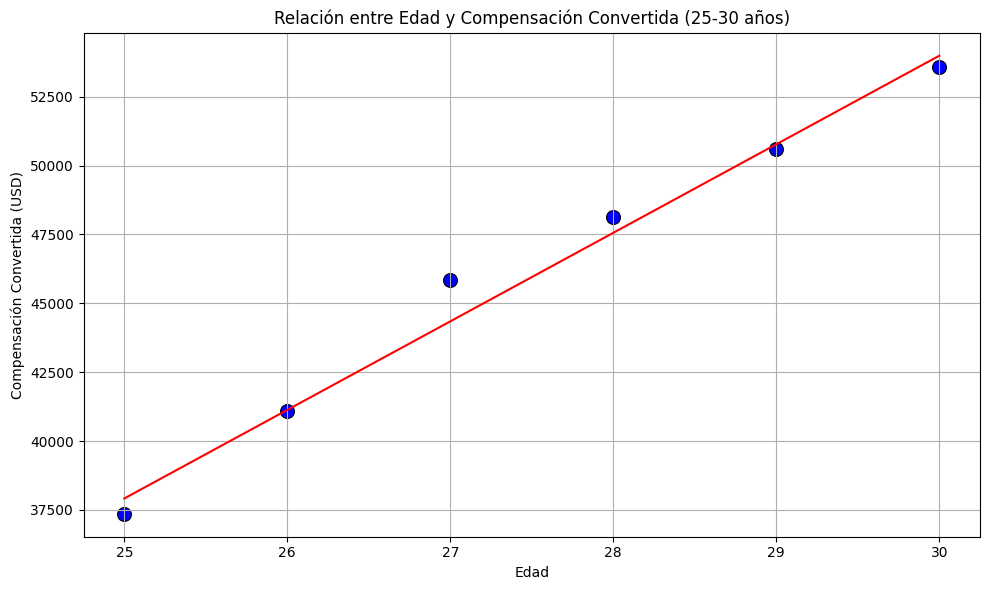

In [120]:
# Filtrar y agrupar los datos
age_comp_median = captone_data[['Age', 'ConvertedComp']].query('25 <= Age <= 30').groupby('Age').median().reset_index()

# Preparar los datos para el modelo
X = age_comp_median[['Age']]
Y = age_comp_median['ConvertedComp']

# Ajustar el modelo HuberRegressor
model = HuberRegressor().fit(X, Y)

# Predicciones para la línea de ajuste
predictions = model.predict(X)

# Crear el gráfico
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=age_comp_median, x='Age', y='ConvertedComp', s=100, color='blue', edgecolor='black')

# Graficar la línea de ajuste del modelo
plt.plot(X, predictions, color='red')

# Añadir título y etiquetas
plt.title('Relación entre Edad y Compensación Convertida (25-30 años)')
plt.xlabel('Edad')
plt.ylabel('Compensación Convertida (USD)')
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

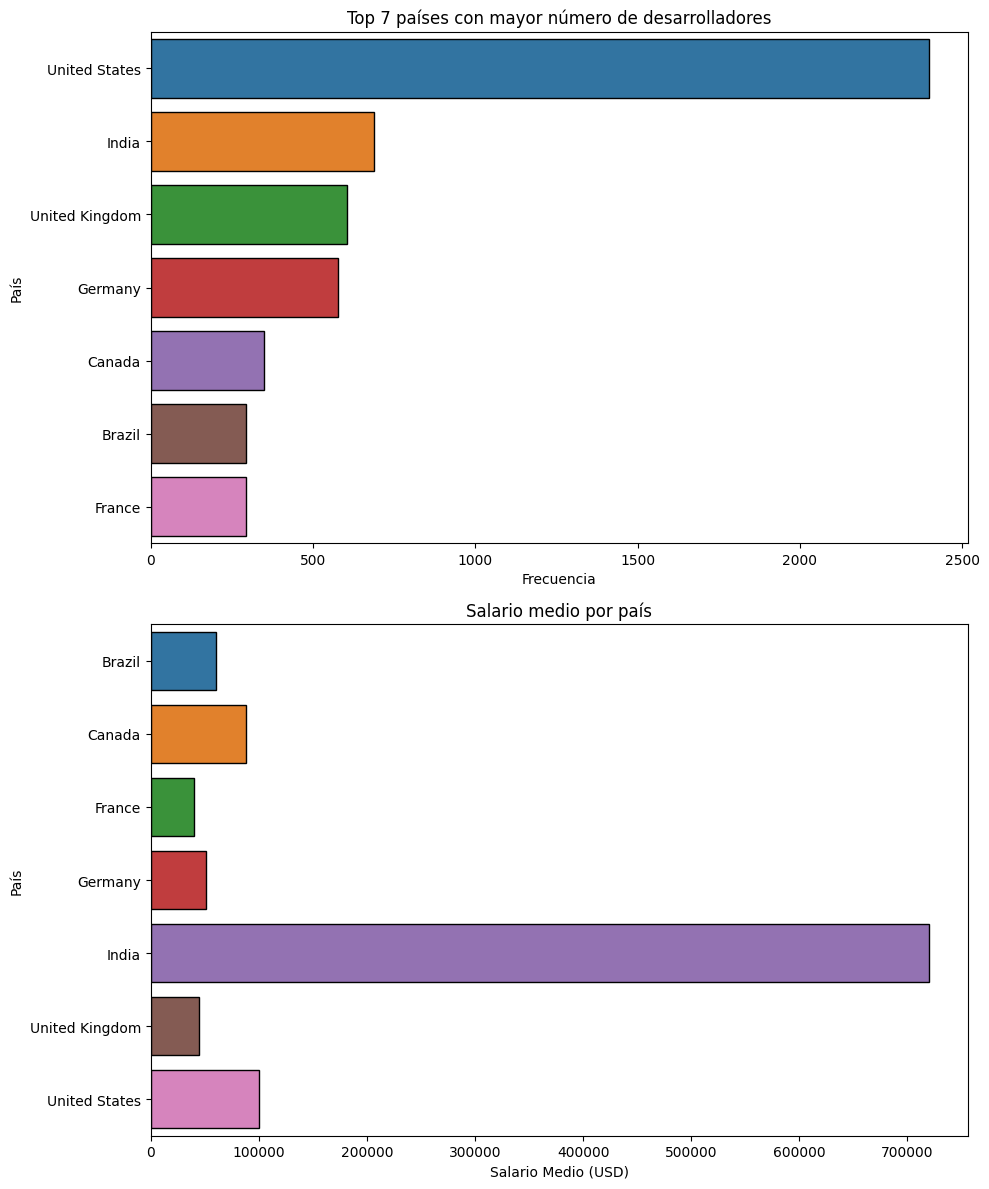

In [116]:

# Obtener los 7 países con mayor número de desarrolladores
top_dev_types = captone_data['Country'].value_counts().head(7).reset_index()
top_dev_types.columns = ['Country', 'Count']

# Calcular el salario medio por país
mean_salary = captone_data.groupby('Country')['CompAnual'].median().reset_index()
mean_salary.columns = ['Country', 'MeanSalary']
top_mean_salary = mean_salary[mean_salary['Country'].isin(top_dev_types['Country'])]

# Crear subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Gráfico de barras del número de desarrolladores por país
colors = sns.color_palette("viridis", len(top_dev_types))
sns.barplot(x='Count', y='Country', data=top_dev_types, hue=colors, edgecolor='black', ax=axes[0])

# Añadir título y etiquetas
axes[0].set_title('Top 7 países con mayor número de desarrolladores')
axes[0].set_xlabel('Frecuencia')
axes[0].set_ylabel('País')
axes[0].legend_.remove()


# Gráfico de barras del salario medio por país
colors = sns.color_palette("viridis", len(top_mean_salary))
sns.barplot(x='MeanSalary', y='Country', data=top_mean_salary, hue=colors, edgecolor='black', ax=axes[1])

# Añadir título y etiquetas
axes[1].set_title('Salario medio por país')
axes[1].set_xlabel('Salario Medio (USD)')
axes[1].set_ylabel('País')
axes[1].legend_.remove()


# Ajustar diseño
plt.tight_layout()
plt.show()



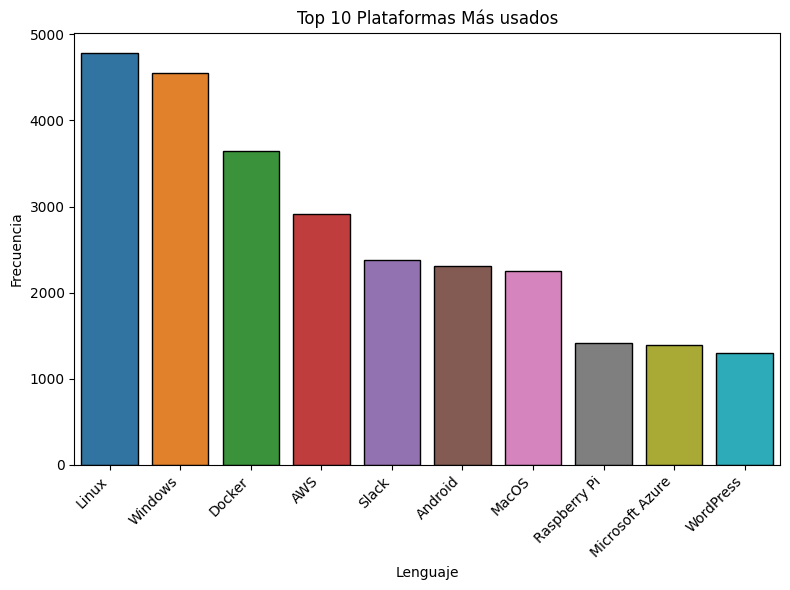

In [117]:
captone_data['PlatformWorkedWith'].str.split(";").explode().value_counts()
# Obtener los 10 lenguajes más deseados
top_language_next = captone_data['PlatformWorkedWith'].str.split(";").explode().value_counts().head(10).reset_index()
top_language_next.columns = ['Language', 'Count']

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
colors = sns.color_palette("viridis", len(top_language_next))
bar_plot = sns.barplot(x='Language', y='Count', data=top_language_next, hue=colors, edgecolor='black')

# Rotar las etiquetas del eje X
plt.xticks(rotation=45, ha='right')

# Añadir título y etiquetas
plt.title('Top 10 Plataformas Más usados')
plt.xlabel('Lenguaje')
plt.ylabel('Frecuencia')
bar_plot.legend_.remove()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

El siguiente gráfico circular nos ayuda a dar una idea de dónde hacer buena publicidad orientada a programadores, o buscar profesionales en el área, lo cual el equipo de marketing o RRHH estaría interesado. 

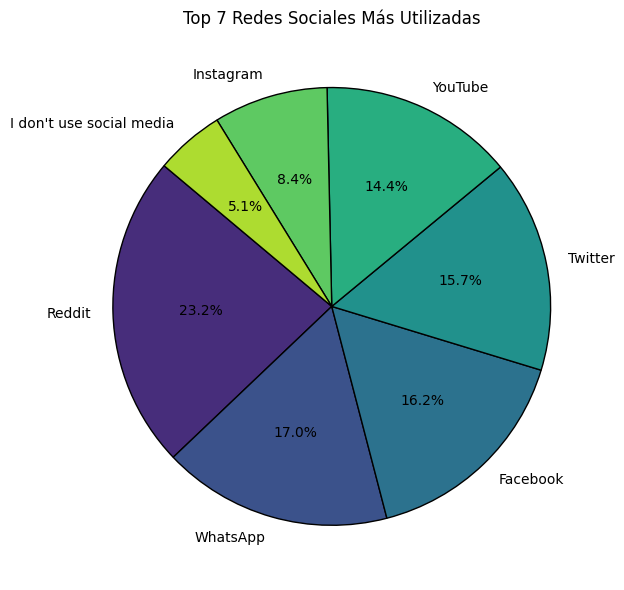

In [118]:
social_media_counts = captone_data['SocialMedia'].value_counts().head(7)

# Crear el gráfico circular
plt.figure(figsize=(10, 6))
colors = sns.color_palette("viridis", len(social_media_counts))
plt.pie(social_media_counts, labels=social_media_counts.index, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

# Añadir título
plt.title('Top 7 Redes Sociales Más Utilizadas')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [139]:
devtype_counts = captone_data['DevType'].str.split(';').explode().value_counts()

# Calcular el porcentaje de cada DevType
devtype_percentages = devtype_counts / devtype_counts.sum() * 100
devtype_percentages[3:].sum()

51.1699919068229